In [297]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import fastica
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [298]:
#Data loading
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)

strdata=strdata[1:,:]
data=strdata.astype('double')

#Dataset 1
data1=data[:,0:-1]
input1=data1[:,0:-1]
input1= MinMaxScaler().fit_transform(input1)
output1=data1[:,-1]
output1[output1>29] = 2
output1[output1>17] = 1
output1[output1>4] = 0 

#Dataset 2
data2=np.delete(data, [2,3,7,8], axis=1)
input2=data2[:,0:-1]
input2= MinMaxScaler().fit_transform(input2)
output2=data2[:,-1]
output2[output2>29] = 2
output2[output2>17] = 1
output2[output2>4] = 0 


In [326]:
####K-Means Clustering
kclusters1= KMeans(random_state=212, n_clusters=3, algorithm="lloyd")
kclus1vals=kclusters1.fit_predict(input1)
kclusperformance1=np.zeros((3,3))
#kclusperformance1[0,1]=2
#print(kclusperformance1)
for i in range(len(kclus1vals)):
    kclusperformance1[kclus1vals[i], int(output1[i])]+=1
    ##X axis is the actual val, y axis is the calculated

print(kclusperformance1)
N=kclus1vals.shape
accuracy= (kclus1vals==output1).sum()/N
#print(accuracy)
#print(kclusters1.cluster_centers_)

n=np.sum(kclusperformance1)
purity1k=np.sum(np.max(kclusperformance1, axis=1))/n
print(purity1k)
kclusters2= KMeans(random_state=212, n_clusters=3, algorithm="lloyd")
kclus2vals=kclusters2.fit_predict(input2)
kclusperformance2=np.zeros((3,3))
#kclusperformance1[0,1]=2
#print(kclusperformance1)
for i in range(len(kclus2vals)):
    kclusperformance2[kclus2vals[i], int(output2[i])]+=1
    ##X axis is the actual val, y axis is the calculated

print(kclusperformance2)
accuracy= (kclus2vals==output2).sum()/N
#print(accuracy)
#print(kclusters2.cluster_centers_)
n=np.sum(kclusperformance2)
purity2k=np.sum(np.max(kclusperformance2, axis=1))/n
print(purity2k)


[[351.  33.   0.]
 [  4. 188.   0.]
 [  2. 190.   0.]]
0.94921875
[[274. 110.   0.]
 [  0.  46. 146.]
 [  0.  44. 148.]]
0.7395833333333334


In [327]:

#####EM Clustering
emclusters1= GaussianMixture(random_state=212, n_components=3)
emclusters1.fit(input1)
emvals1=emclusters1.predict(input1)

emperform1=np.zeros((3,3))
for i in range(len(emvals1)):
    emperform1[emvals1[i], int(output1[i])]+=1
    ##X axis is the actual val, y axis is the calculated

print(emperform1)
N=emvals1.shape
accuracy= (emvals1==output1).sum()/N
print(accuracy)
print(emclusters1.weights_)
print(emclusters1.means_)
purity1em=np.sum(np.max(emperform1, axis=1))/n
print(purity1em)



##########################################
emclusters2= GaussianMixture(random_state=212, n_components=3)
emclusters2.fit(input2)
emvals2=emclusters2.predict(input2)

emperform2=np.zeros((3,3))
for i in range(len(emvals2)):
    emperform2[emvals2[i], int(output2[i])]+=1
    ##X axis is the actual val, y axis is the calculated

print(emperform2)
N=emvals2.shape
accuracy= (emvals2==output2).sum()/N
print(accuracy)
print(emclusters2.weights_)
print(emclusters2.means_)
purity2em=np.sum(np.max(emperform2, axis=1))/n

###Values
#kclusters1.labels_
#kclusters1.cluster_centers_

[[351.  33.   0.]
 [  6. 162.   0.]
 [  0. 216.   0.]]
[0.66796875]
[0.5       0.2218034 0.2781966]
[[0.15740741 0.79166667 0.35714286 1.         0.         0.5
  0.5859375  0.5625    ]
 [0.64351852 0.27777778 0.5        0.2037037  1.         0.5
  0.55834512 0.27457023]
 [0.64351852 0.27777778 0.5        0.2037037  1.         0.5
  0.60793663 0.79206357]]
0.94921875
[[274. 110.   0.]
 [  0.  46. 146.]
 [  0.  44. 148.]]
[0.609375]
[0.5  0.25 0.25]
[[0.15740741 0.79166667 0.         0.5        0.5859375 ]
 [0.64351852 0.27777778 1.         0.17070075 0.5859375 ]
 [0.64351852 0.27777778 1.         0.82929925 0.5859375 ]]


In [301]:
###PCA
pca1=PCA(n_components=7, random_state=212)
pcadata1=pca1.fit(input1)
pcadata1= pca1.transform(input1)
print(pca1.components_)
print(pca1.explained_variance_)
#print(pcadata1[0].max())


pca2=PCA(n_components=4, random_state=212)
pca2.fit(input2)
pcadata2= pca2.transform(input2)
print(pca2.components_)
print(pca2.explained_variance_)



[[ 3.58577524e-01 -3.72555005e-01  5.91546821e-02 -5.42749204e-01
   6.59203271e-01 -3.37632430e-18 -6.52264480e-17 -5.69961281e-17]
 [ 9.10729825e-17  2.64188034e-16 -3.73529453e-16 -1.64114296e-16
  -7.01341566e-18 -1.00000000e+00 -1.55431223e-15 -4.02455846e-16]
 [ 1.21004125e-16  2.53670687e-16 -4.15375570e-16 -8.50528040e-17
  -8.60305702e-17  1.05471187e-15 -8.11461340e-01 -5.84406104e-01]
 [-3.73750511e-01  3.62850393e-01  8.13127868e-01 -1.48632263e-01
   2.13029738e-01 -2.19039399e-16  4.57383048e-16 -1.14319683e-15]
 [-4.02221481e-16  3.94782009e-16  1.02132336e-15 -2.18559887e-16
   1.82641316e-16  3.33066907e-16 -5.84406104e-01  8.11461340e-01]
 [ 4.13509509e-01 -1.31468465e-01  3.50092156e-01 -4.47585185e-01
  -6.99163010e-01 -4.94599707e-17  3.92077819e-17 -1.06657116e-16]
 [-7.48827484e-01 -4.32100635e-01 -1.84193268e-01 -4.32872749e-01
  -1.76749721e-01 -4.13417110e-17 -5.53600654e-17 -4.58033541e-17]]
[5.56548491e-01 1.39069970e-01 1.26768352e-01 9.32975812e-02
 8.0373

In [302]:

###ICA
[k1, w1, s1]=fastica(input1, n_components=7,random_state=212, compute_sources=True)

#A is inverse of WK
#X=inv(WK) * S

#print('independent components columns')
#print(s1.shape) #768,7
#print(input1.shape) #768,8
icadata1=s1
wk1=np.linalg.pinv(np.matmul(w1,k1))
#print(wk1.shape) #7,8
input1trans=np.transpose(np.matmul(wk1, np.transpose(s1)))
error=np.sqrt(np.mean((input1trans-input1)**2))
print(error)
print(input1)
print(input1trans)


[k2, w2, s2]=fastica(input2, n_components=4,random_state=212, compute_sources=True)

icadata2=s2
wk2=np.linalg.pinv(np.matmul(w2,k2))
#print(wk1.shape) #7,8
input2trans=np.transpose(np.matmul(wk2, np.transpose(s2)))
error=np.sqrt(np.mean((input2trans-input2)**2))

#print(error)
#print(input2)
#print(input2trans)


#calculate Kurtosis

n=np.shape(s1)[0]
mean=np.sum((s1)/n, axis=0)
var = np.sum((s1-mean)**2, axis=0)/n # Calculate the variance
skew = np.sum((s1-mean)**3,  axis=0)/n # Calculate the skewness
kurt = np.sum((s1-mean)**4, axis=0)/n # Calculate the kurtosis
kurt = kurt/(var**2)-3
print('kurt')
print(kurt)

mean=np.sum((input1)/n, axis=0)
var = np.sum((input1-mean)**2, axis=0)/n # Calculate the variance
skew = np.sum((input1-mean)**3,  axis=0)/n # Calculate the skewness
kurt = np.sum((input1-mean)**4, axis=0)/n # Calculate the kurtosis
kurt = kurt/(var**2)-3
print('kurt')
print(kurt)

n=np.shape(s1)[0]
mean=np.sum((s2)/n, axis=0)
var = np.sum((s2-mean)**2, axis=0)/n # Calculate the variance
skew = np.sum((s2-mean)**3,  axis=0)/n # Calculate the skewness
kurt = np.sum((s2-mean)**4, axis=0)/n # Calculate the kurtosis
kurt = kurt/(var**2)-3
print('kurt')
print(kurt)

mean=np.sum((input2)/n, axis=0)
var = np.sum((input2-mean)**2, axis=0)/n # Calculate the variance
skew = np.sum((input2-mean)**3,  axis=0)/n # Calculate the skewness
kurt = np.sum((input2-mean)**4, axis=0)/n # Calculate the kurtosis
kurt = kurt/(var**2)-3
print('kurt')
print(kurt)

0.5186432498012064
[[1.         0.         0.28571429 ... 0.         0.         0.        ]
 [1.         0.         0.28571429 ... 0.33333333 0.         0.        ]
 [1.         0.         0.28571429 ... 0.66666667 0.         0.        ]
 ...
 [0.         1.         0.71428571 ... 0.33333333 1.         1.        ]
 [0.         1.         0.71428571 ... 0.66666667 1.         1.        ]
 [0.         1.         0.71428571 ... 1.         1.         1.        ]]
[[ 0.59953704 -0.53472222 -0.14285714 ... -0.5        -0.5859375
  -0.5625    ]
 [ 0.59953704 -0.53472222 -0.14285714 ... -0.16666667 -0.5859375
  -0.5625    ]
 [ 0.59953704 -0.53472222 -0.14285714 ...  0.16666667 -0.5859375
  -0.5625    ]
 ...
 [-0.40046296  0.46527778  0.28571429 ... -0.16666667  0.4140625
   0.4375    ]
 [-0.40046296  0.46527778  0.28571429 ...  0.16666667  0.4140625
   0.4375    ]
 [-0.40046296  0.46527778  0.28571429 ...  0.5         0.4140625
   0.4375    ]]
kurt
[ 4.23131258 -1.36       -1.24189183 -1.844424

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [303]:

###Randomized Projections
i=0
while i<20:
    randproj1=GaussianRandomProjection(n_components=7)
    randproj1.fit(input1)
    randprojdata1=randproj1.transform(input1)
    reset1=randproj1.inverse_transform(randprojdata1)
    error=np.sqrt(np.mean((reset1-input1)**2))
    print(error)
    i+=1

i=0
while i<20:
    randproj2=GaussianRandomProjection(n_components=4)
    randproj2.fit(input2)
    randprojdata2=randproj2.transform(input2)
    reset2=randproj2.inverse_transform(randprojdata2)
    error=np.sqrt(np.mean((reset2-input2)**2))
    print(error)
    i+=1

#print(randproj2.components_)




0.3085556453105598
0.1789966030006829
0.1162910822448459
0.22246586194002926
0.26290922996830596
0.10983988535416937
0.19988694249207978
0.17828693714260616
0.16062905182870502
0.3289104127605071
0.148458783248734
0.45200689885293116
0.1466713141575166
0.22097052286527982
0.2963560054046743
0.09800697197209952
0.1486899240045353
0.15769209781599083
0.18959390049997576
0.289600178860372
0.2707883705916325
0.4406329321222605
0.3295674003030336
0.3936791244845599
0.2850341587077608
0.3366850214914971
0.2834436027193633
0.346579796742564
0.48893827930686357
0.26635758429779854
0.20438812474669815
0.18115436631557416
0.18879421435648838
0.29581152072781325
0.15278750859560294
0.11713020578018798
0.29542410587165424
0.1913501214237307
0.47211316064424175
0.1654231379404197


In [304]:
##Linear Discriminant Analysis
lda1=LinearDiscriminantAnalysis(n_components=2)
ldadata1=lda1.fit_transform(input1, output1)
print(lda1.coef_)
print(np.sum(abs(lda1.coef_), axis=0))
print(ldadata1.shape)

lda2=LinearDiscriminantAnalysis(n_components=2)
ldadata2=lda2.fit_transform(input2, output2)
print(lda2.coef_)
print(np.sum(abs(lda2.coef_), axis=0))
print(ldadata2.shape)

[[-4.51427048e+00 -4.77025097e+00 -4.20843825e+00 -2.58590792e+00
  -1.65959706e+01 -2.53404701e-02 -3.87228033e+00  3.00753611e-01]
 [ 2.32196789e+01  1.36181897e+01  6.51582232e+00  1.36495905e+01
   1.38402741e+01  8.25635750e-02  9.07825291e-01 -4.72474382e-01]
 [-9.82904390e+00 -2.60721187e+00  1.61752849e+00 -5.87879519e+00
   1.48253110e+01 -2.11325979e-02  5.11319147e+00 -1.10733000e-01]]
[37.56299331 20.99565258 12.34178907 22.11429358 45.26155578  0.12903664
  9.89329709  0.88396099]
(768, 2)
[[-12.79000465 -18.47271385 -13.55147751  -0.28369596  -3.7644174 ]
 [  7.16336968   7.82249436  -0.18409184   0.06108162  -0.17311489]
 [  7.0468957   11.89464191  12.75484083   0.22284479   3.62609982]]
[27.00027004 38.18985012 26.49041018  0.56762238  7.56363211]
(768, 2)


In [340]:
data1=[pcadata1, icadata2,randprojdata1, ldadata1]
data2=[pcadata2, icadata2, randprojdata2, ldadata2]

clustervalz=[]
purities1k=[]
purities1em=[]
purities2k=[]
purities2em=[]
purities1k.append(purity1k)
purities1em.append(purity1em)
purities2k.append(purity2k)
purities2em.append(purity2em)
purities2=[]
print(purity1k)
for dat in data1:
    cluster=KMeans(random_state=212, n_clusters=3)
    clustervals=cluster.fit_predict(dat)
    clusterperformance=np.zeros((3,3))
    for i in range(len(clustervals)):
        clusterperformance[clustervals[i], int(output1[i])]+=1
        ##X axis is the actual val, y axis is the calculated
    #print(clusterperformance)
    accuracy= (clustervals==output1).sum()/n 
    clustervalz.append(clustervals)
    purity=np.sum(np.max(clusterperformance, axis=1))/n
    print((np.max(clusterperformance, axis=1)))
    print(np.sum(np.max(clusterperformance, axis=1)))
    purities1k.append(purity[0])

    emclusters= GaussianMixture(random_state=212, n_components=3)
    emclusters.fit(dat)
    emvals=emclusters.predict(dat)

    emperform=np.zeros((3,3))
    for i in range(len(emvals)):
        emperform[emvals[i], int(output1[i])]+=1
        ##X axis is the actual val, y axis is the calculated

    clustervalz.append(emvals)
    #print(emperform)
    purity=np.sum(np.max(emperform, axis=1))/n
    purities1em.append(purity[0])

for dat in data2:
    cluster=KMeans(random_state=212, n_clusters=3)
    clustervals=cluster.fit_predict(dat)
    clusterperformance=np.zeros((3,3))
    for i in range(len(clustervals)):
        clusterperformance[clustervals[i], int(output2[i])]+=1
        ##X axis is the actual val, y axis is the calculated
    #print(clusterperformance)
    accuracy= (clustervals==output1).sum()/n
    emclusters= GaussianMixture(random_state=212, n_components=3)
    emclusters.fit(dat)
    emvals=emclusters.predict(dat)
    purity=np.sum(np.max(clusterperformance, axis=1))/n
    purities2k.append(purity[0])

    emperform=np.zeros((3,3))
    for i in range(len(emvals)):
        emperform[emvals[i], int(output2[i])]+=1
        ##X axis is the actual val, y axis is the calculated

    #print(emperform)
    accuracy= (emvals==output2).sum()/n
    purity=np.sum(np.max(emperform, axis=1))/n
    purities2em.append(purity[0])

print(purities1k)
print(purities1em)
print(purities2k)
print(purities2em)



0.94921875
[351. 188. 190.]
729.0
[148. 230. 351.]
729.0
[351. 188. 190.]
729.0
[351. 248. 130.]
729.0
[0.94921875, 0.94921875, 0.94921875, 0.94921875, 0.94921875]
[0.94921875, 0.94921875, 0.94921875, 0.94921875, 0.94921875]
[0.7395833333333334, 0.7395833333333334, 0.7395833333333334, 0.7291666666666666, 0.765625]
[0.7395833333333334, 0.7395833333333334, 0.7395833333333334, 0.7395833333333334, 0.7526041666666666]


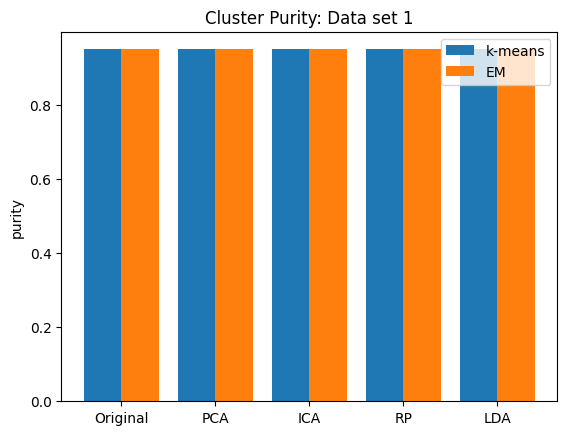

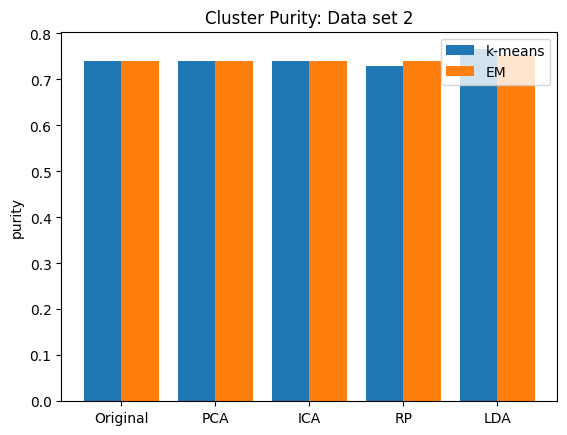

In [341]:
import matplotlib.pyplot as plt
x = np.arange(5)
plt.title("Cluster Purity: Data set 1")
width = 0.40
plt.bar( x-0.2,purities1k, width)
plt.bar( x+0.2, purities1em, width)
plt.ylabel("purity")
plt.legend(["k-means", "EM"])
plt.xticks(x, ['Original', 'PCA', 'ICA', 'RP', 'LDA'])
plt.show()

x = np.arange(5)
plt.title("Cluster Purity: Data set 2")
width = 0.40
plt.bar( x-0.2,purities2k, width)
plt.bar( x+0.2, purities2em, width)
plt.ylabel("purity")
plt.legend(["k-means", "EM"])
plt.xticks(x, ['Original', 'PCA', 'ICA', 'RP', 'LDA'])
plt.show()

In [306]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
import six
import sys
sys.modules['sklearn.externals.six']=six

import mlrose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlr

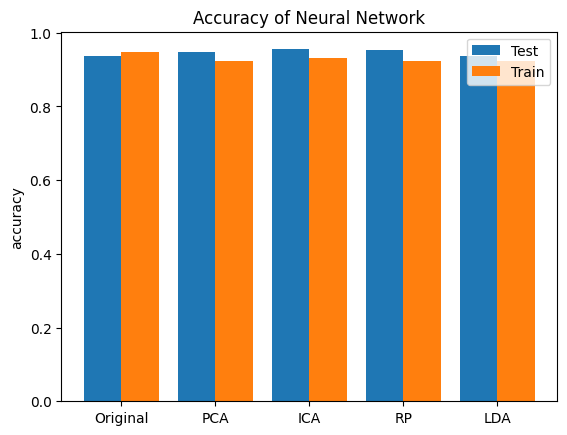

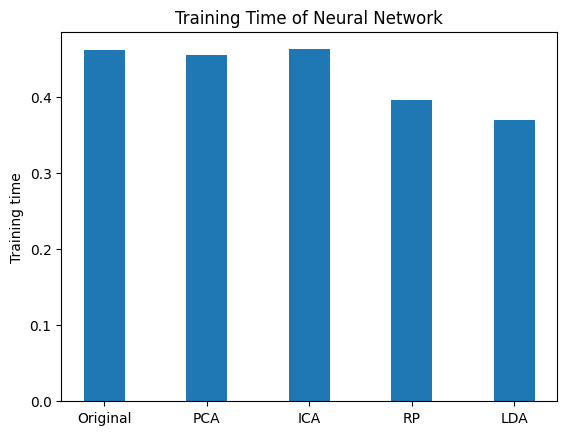

In [307]:
###Rerun neural network
data1=[input1, pcadata1, icadata2,randprojdata1, ldadata1]
output1[output1==2]=1
timetrain=[]
trainacc=[]
testacc=[]
for dataz in data1:
    X_train, X_test, y_train, y_test = train_test_split (dataz, output1.astype('int'))
    model=mlrose.NeuralNetwork(algorithm='gradient_descent', activation= 'tanh', curve=True, learning_rate=0.2, random_state=212, max_iters=200)#, early_stopping=True, max_attempts=10)
    time0=time.time()
    model.fit(X_train, y_train)
    time1=time.time()
    train_predic=model.predict(X_train)
    test_predic=model.predict(X_test)

    timetotrain=time1-time0
    timetrain.append(timetotrain)
    train_acc=accuracy_score(y_train, train_predic)
    test_acc= accuracy_score(y_test, test_predic)
    trainacc.append(train_acc)
    testacc.append(test_acc)
    loss=model.loss


x = np.arange(5)
plt.title("Accuracy of Neural Network")
width = 0.40
plt.bar( x-0.2,trainacc, width)
plt.bar( x+0.2, testacc, width)
plt.ylabel("accuracy")
plt.legend(["train", "test"])
plt.xticks(x, ['Original', 'PCA', 'ICA', 'RP', 'LDA'])
plt.legend(["Test", "Train"])#"", "Round 2", "Round 3"])
plt.show()

plt.title("Training Time of Neural Network")
width = 0.40
plt.bar( x,timetrain, width)
plt.ylabel("Training time")
plt.xticks(x, ['Original', 'PCA', 'ICA', 'RP', 'LDA'])
plt.show()

  
# plot data in grouped manner of bar type

##Add plotting stuff

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/mlr

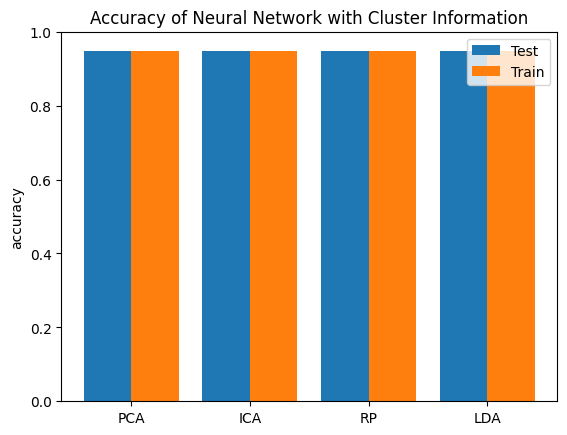

In [343]:
###adding cluster as a value
data1=[pcadata1, icadata2,randprojdata1, ldadata1]
i=0
kmaccuracy=[]
emaccuracy=[]
for dataz in data1:
    clustervalz[i]=np.reshape(clustervalz[i], (-1, 1))
    inputwclustkm = np.append(data, clustervalz[i], axis=1)
    i+=1
    clustervalz[i]=np.reshape(clustervalz[i], (-1, 1))
    inputwclustem = np.append(data, clustervalz[i], axis=1)
    i+=1
    X_train, X_test, y_train, y_test = train_test_split (inputwclustkm, output1)
    model=mlrose.NeuralNetwork(algorithm='gradient_descent', activation= 'tanh', curve=True, learning_rate=0.2, random_state=212, max_iters=200)#, early_stopping=True, max_attempts=10)
    time0=time.time()
    model.fit(X_train, y_train)
    time1=time.time()
    train_predic=model.predict(X_train)
    test_predic=model.predict(X_test)
    timetotrain=time1-time0
    train_acc=accuracy_score(y_train, train_predic)
    test_acc= accuracy_score(y_test, test_predic)
    kmaccuracy.append(test_acc)


    X_train, X_test, y_train, y_test = train_test_split (inputwclustem, output1)
    model=mlrose.NeuralNetwork(algorithm='gradient_descent', activation= 'tanh', curve=True, learning_rate=0.2, random_state=212, max_iters=200)#, early_stopping=True, max_attempts=10)
    time0=time.time()
    model.fit(X_train, y_train)
    time1=time.time()
    train_predic=model.predict(X_train)
    test_predic=model.predict(X_test)
    timetotrain=time1-time0
    train_acc=accuracy_score(y_train, train_predic)
    test_acc= accuracy_score(y_test, test_predic)
    emaccuracy.append(test_acc)
        



x = np.arange(4)
plt.title("Accuracy of Neural Network with Cluster Information")
width = 0.40
plt.bar( x-0.2,kmaccuracy, width)
plt.bar( x+0.2, emaccuracy, width)
plt.ylabel("accuracy")
plt.legend(["K-Means", "EM"])
plt.xticks(x, ['PCA', 'ICA', 'RP', 'LDA'])
plt.legend(["Test", "Train"])#"", "Round 2", "Round 3"])
plt.ylim([0, 1])#1])
plt.show()
